# 수업 내용 이해

이번 스텝에서는 Pandas로 자동차 데이터를 분석해보고자합니다.<br>

실행을 하기 전 결과를 예상하고 <br>
복붙이 아닌 타이핑으로 문법에 대해 <br>
익숙해지시면서 따라하시길 추천 드립니다.<br>

목차
- 실습

## 필요패키지 및 alias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import folium
from tqdm import tqdm

## 데이터 준비 및 파악 

실습에 사용하시고 싶은 이미지를 코드와 같은 위치에 <br>
`data.txt`로 저장합니다. <br> 

In [2]:
data = pd.read_csv('./data.txt', sep = "\t", encoding = "euc-kr")

In [3]:
data.head(1)

,제원관리번호,차종명,차종유형명,차종분류명,원동기형식명,형식명,배기량,승차정원수,최대적재량,차명,...,차량총중량,최초제원관리번호,원동기RPM값,타이어전전형식,타이어전후형식,타이어후전형식,타이어후중형식,타이어후후형식,구동방식코드,최초취득금액
0,A0710002200151221,승용,다목적,중형,L3T,PD56L,1341.0,5,0.0,트레일블레이저 1.35 TURBO AWD,...,1795,NaN,5600.0,225/55R18,NaN,225/55R18,NaN,NaN,4륜구동(선택),29700000


In [4]:
for i, k in enumerate(list(data.head(0))):
    print("{}:{}".format(i,k))

0:제원관리번호
1:차종명
2:차종유형명
3:차종분류명
4:원동기형식명
5:형식명
6:배기량
7:승차정원수
8:최대적재량
9:차명
10:모델연도
11:사용연료명
12:국산수입구분명
13:차대차체형상명
14:차체길이
15:차체너비
16:차체높이
17:축간거리
18:전윤간거리
19:후윤간거리
20:변속기종류명
21:제원모델년도
22:차량등록번호
23:차대번호
24:등록관청명
25:용도구분명
26:신청구분명
27:등록일
28:등록상세명
29:최초등록일
30:제작년월일
31:회원구분명
32:회원등록번호
33:사용본거지주소명
34:소유자주소명
35:취득금액
36:원동기최고출력
37:연료소비율
38:차량중량
39:차량총중량
40:최초제원관리번호
41:원동기RPM값
42:타이어전전형식
43:타이어전후형식
44:타이어후전형식
45:타이어후중형식
46:타이어후후형식
47:구동방식코드
48:최초취득금액


In [5]:
# 원하는 컬럼 선택
df_selected = data.iloc[:, [1,2,3,9,11,12,23,29,30,31,32,33,34,35,48]]

In [6]:
# 데이터 확인
df_selected.head(1)

,차종명,차종유형명,차종분류명,차명,사용연료명,국산수입구분명,차대번호,최초등록일,제작년월일,회원구분명,회원등록번호,사용본거지주소명,소유자주소명,취득금액,최초취득금액
0,승용,다목적,중형,트레일블레이저 1.35 TURBO AWD,휘발유,국산,KLAPD56LDPBXXXXXX,202211,202210,개인,30대 여자,서울특별시 동대문구,서울특별시 동대문구,29700000,29700000


In [7]:
# 특정 컬럼의 유니크값 보기 
df_selected['회원등록번호'].unique()

array(['30대 여자', '50대 남자', '50대 여자', '40대 남자', '60대 남자', nan, '30대 남자',
       '40대 여자', '20대 남자', '60대 여자', '70대 남자', '20대 여자', '70대 여자',
       '80대 여자', '80대 남자', '10대 남자', '10대 여자', '90대 남자', '90대 여자'],
      dtype=object)

In [8]:
# 10대들 필터링 
filtered_df = df_selected[df_selected['회원등록번호'].str.contains('10대', na=False)]

In [9]:
filtered_df.head(1)

,차종명,차종유형명,차종분류명,차명,사용연료명,국산수입구분명,차대번호,최초등록일,제작년월일,회원구분명,회원등록번호,사용본거지주소명,소유자주소명,취득금액,최초취득금액
1002,승용,다목적,대형,싼타페(SANTAFE),휘발유(무연),국산,KMHS281LGPUXXXXXX,202211,202211,개인,10대 남자,경상북도 포항시 북구,경상북도 포항시 북구,29200000,29200000


In [10]:
filtered_df['차명'].unique()

array(['싼타페(SANTAFE)', '포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI',
       '싼타페 하이브리드(SANTAFE HYBRID)', '아이오닉5 (IONIQ5)', '쏘나타(SONATA)',
       '아이오닉6 (IONIQ6)', 'K8 하이브리드', 'K8', '베뉴(VENUE)', '카니발 리무진', '카니발',
       '그랜저(GRANDEUR)', '넥쏘 (NEXO) 수소전기차', '코나(KONA)', '팰리세이드(PALISADE)',
       '스포티지 하이브리드', '투싼(TUCSON)', '코나 하이브리드(KONA HYBRID)', '쏘렌토 하이브리드',
       '쏘렌토', '스포티지', 'K3', 'BMW 520i', '쏘나타 하이브리드 (SONATA HYBRID)',
       '유니캠프스타리아팝업루프캠핑카', '아반떼(AVANTE)', 'CHEVROLET BOLT EV', '모닝', '셀토스',
       'EV6 GT', 'EV6', '레이', '카니발 하이리무진', 'GV80', 'G70', 'QM6', '토레스',
       '니로 하이브리드', 'GV70', 'K5', '포터Ⅱ냉동탑차 (PORTER Ⅱ)', 'G80', 'G90',
       '티볼리 에어', 'MASTER'], dtype=object)

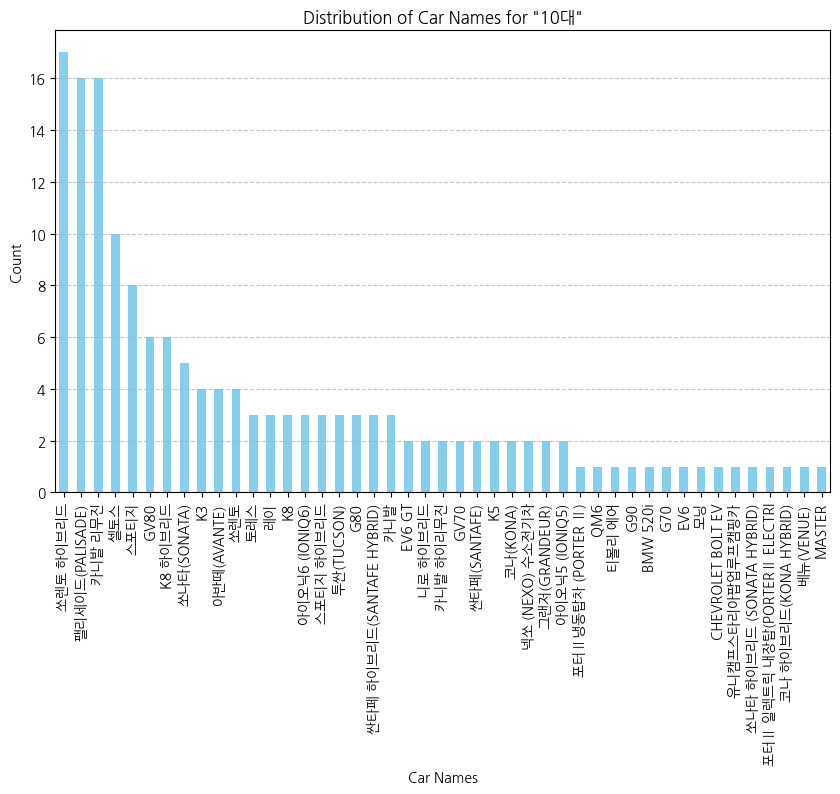

In [11]:
# '차명' 컬럼의 값 분포 계산
car_name_counts = filtered_df['차명'].value_counts()


# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 예: 'NanumGothic', 시스템에 설치된 한글 폰트 이름


# 그래프 그리기
plt.figure(figsize=(10, 6))
car_name_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Car Names for "10대"')
plt.xlabel('Car Names')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

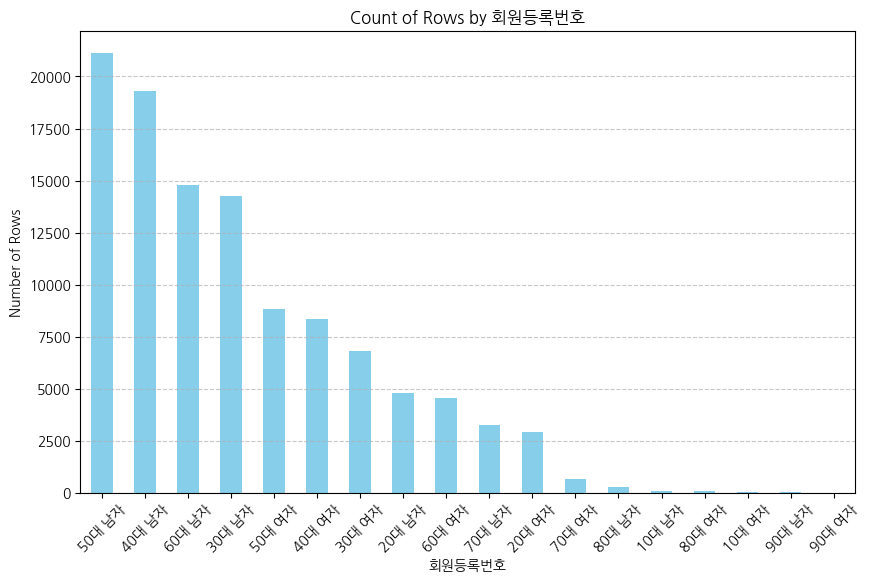

In [12]:
# 각 연령별 얼마나 차를 삿을까?
member_counts = df_selected['회원등록번호'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))
member_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Rows by 회원등록번호')
plt.xlabel('회원등록번호')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# https://gist.github.com/hmmhmmhm/b3a950e84f865f8abbd00fa460aa4613
좌표 = {
    "서울특별시/강남구": {
        "lat": "37.4951",
        "long": "127.06278"
    },
    "서울특별시/강동구": {
        "lat": "37.55274",
        "long": "127.14546"
    },
    "서울특별시/강북구": {
        "lat": "37.6349",
        "long": "127.02015"
    },
    "서울특별시/강서구": {
        "lat": "37.56227",
        "long": "126.81622"
    },
    "서울특별시/관악구": {
        "lat": "37.47876",
        "long": "126.95235"
    },
    "서울특별시/광진구": {
        "lat": "37.53913",
        "long": "127.08366"
    },
    "서울특별시/구로구": {
        "lat": "37.49447",
        "long": "126.8502"
    },
    "서울특별시/금천구": {
        "lat": "37.47486",
        "long": "126.89106"
    },
    "서울특별시/노원구": {
        "lat": "37.66045",
        "long": "127.06718"
    },
    "서울특별시/도봉구": {
        "lat": "37.65066",
        "long": "127.03011"
    },
    "서울특별시/동대문구": {
        "lat": "37.58189",
        "long": "127.05408"
    },
    "서울특별시/동작구": {
        "lat": "37.50056",
        "long": "126.95149"
    },
    "서울특별시/마포구": {
        "lat": "37.55438",
        "long": "126.90926"
    },
    "서울특별시/서대문구": {
        "lat": "37.57809",
        "long": "126.93506"
    },
    "서울특별시/서초구": {
        "lat": "37.49447",
        "long": "127.01088"
    },
    "서울특별시/성동구": {
        "lat": "37.54784",
        "long": "127.02461"
    },
    "서울특별시/성북구": {
        "lat": "37.60267",
        "long": "127.01448"
    },
    "서울특별시/송파구": {
        "lat": "37.5021",
        "long": "127.11113"
    },
    "서울특별시/양천구": {
        "lat": "37.52056",
        "long": "126.87472"
    },
    "서울특별시/영등포구": {
        "lat": "37.52606",
        "long": "126.90308"
    },
    "서울특별시/용산구": {
        "lat": "37.53391",
        "long": "126.9775"
    },
    "서울특별시/은평구": {
        "lat": "37.61846",
        "long": "126.9278"
    },
    "서울특별시/종로구": {
        "lat": "37.5729",
        "long": "126.97928"
    },
    "서울특별시/중구": {
        "lat": "37.55986",
        "long": "126.99398"
    },
    "서울특별시/중랑구": {
        "lat": "37.60199",
        "long": "127.10461"
    },
    "부산광역시/강서구": {
        "lat": "35.1593",
        "long": "128.933"
    },
    "부산광역시/금정구": {
        "lat": "35.25863",
        "long": "129.0901"
    },
    "부산광역시/기장군": {
        "lat": "35.29721",
        "long": "129.20076"
    },
    "부산광역시/남구": {
        "lat": "35.13648",
        "long": "129.08266"
    },
    "부산광역시/동구": {
        "lat": "35.12468",
        "long": "129.03432"
    },
    "부산광역시/동래구": {
        "lat": "35.20447",
        "long": "129.078"
    },
    "부산광역시/부산진구": {
        "lat": "35.16293",
        "long": "129.05133"
    },
    "부산광역시/북구": {
        "lat": "35.19724",
        "long": "128.99134"
    },
    "부산광역시/사상구": {
        "lat": "35.14479",
        "long": "128.97986"
    },
    "부산광역시/사하구": {
        "lat": "35.08552",
        "long": "128.98725"
    },
    "부산광역시/서구": {
        "lat": "35.12529",
        "long": "129.01946"
    },
    "부산광역시/수영구": {
        "lat": "35.15627",
        "long": "129.11253"
    },
    "부산광역시/연제구": {
        "lat": "35.18206",
        "long": "129.08285"
    },
    "부산광역시/영도구": {
        "lat": "35.07849",
        "long": "129.06483"
    },
    "부산광역시/중구": {
        "lat": "35.10594",
        "long": "129.03331"
    },
    "부산광역시/해운대구": {
        "lat": "35.16665",
        "long": "129.16792"
    },
    "인천광역시/강화군": {
        "lat": "37.74722",
        "long": "126.48556"
    },
    "인천광역시/계양구": {
        "lat": "37.52306",
        "long": "126.74472"
    },
    "인천광역시/남구": {
        "lat": "37.46362",
        "long": "126.65"
    },
    "인천광역시/남동구": {
        "lat": "37.41831",
        "long": "126.7184"
    },
    "인천광역시/동구": {
        "lat": "37.48375",
        "long": "126.6369"
    },
    "인천광역시/부평구": {
        "lat": "37.4972",
        "long": "126.71107"
    },
    "인천광역시/서구": {
        "lat": "37.55233",
        "long": "126.65543"
    },
    "인천광역시/연수구": {
        "lat": "37.41911",
        "long": "126.66489"
    },
    "인천광역시/옹진군": {
        "lat": "37.23361",
        "long": "126.12305"
    },
    "인천광역시/중구": {
        "lat": "37.47353",
        "long": "126.62151"
    },
    "대구광역시/중구": {
        "lat": "35.86678",
        "long": "128.59538"
    },
    "대구광역시/동구": {
        "lat": "35.88566",
        "long": "128.63296"
    },
    "대구광역시/서구": {
        "lat": "35.87465",
        "long": "128.55109"
    },
    "대구광역시/남구": {
        "lat": "35.84119",
        "long": "128.588"
    },
    "대구광역시/북구": {
        "lat": "35.9",
        "long": "128.59175"
    },
    "대구광역시/수성구": {
        "lat": "35.85905",
        "long": "128.62625"
    },
    "대구광역시/달서구": {
        "lat": "35.82569",
        "long": "128.52403"
    },
    "대구광역시/달성군": {
        "lat": "35.77467",
        "long": "128.42955"
    },
    "광주광역시/동구": {
        "lat": "35.14592",
        "long": "126.9232"
    },
    "광주광역시/서구": {
        "lat": "35.15248",
        "long": "126.89106"
    },
    "광주광역시/남구": {
        "lat": "35.12159",
        "long": "126.90943"
    },
    "광주광역시/북구": {
        "lat": "35.19232",
        "long": "126.92439"
    },
    "광주광역시/광산구": {
        "lat": "35.16158",
        "long": "126.8081"
    },
    "대전광역시/동구": {
        "lat": "36.32938",
        "long": "127.44313"
    },
    "대전광역시/중구": {
        "lat": "36.28044",
        "long": "127.41093"
    },
    "대전광역시/서구": {
        "lat": "36.28071",
        "long": "127.34533"
    },
    "대전광역시/유성구": {
        "lat": "36.36685",
        "long": "127.327"
    },
    "대전광역시/대덕구": {
        "lat": "36.39591",
        "long": "127.43437"
    },
    "울산광역시/중구": {
        "lat": "35.5684",
        "long": "129.33226"
    },
    "울산광역시/남구": {
        "lat": "35.54382",
        "long": "129.32917"
    },
    "울산광역시/동구": {
        "lat": "35.5047",
        "long": "129.4186"
    },
    "울산광역시/북구": {
        "lat": "35.58243",
        "long": "129.36049"
    },
    "울산광역시/울주군": {
        "lat": "35.56233",
        "long": "129.1269"
    },
    "경기도/가평군": {
        "lat": "37.8308",
        "long": "127.51522"
    },
    "경기도/고양시": {
        "lat": "37.65639",
        "long": "126.835"
    },
    "경기도/과천시": {
        "lat": "37.43407",
        "long": "126.99989"
    },
    "경기도/광명시": {
        "lat": "37.44435",
        "long": "126.86499"
    },
    "경기도/광주시": {
        "lat": "35.16667",
        "long": "126.91667"
    },
    "경기도/구리시": {
        "lat": "37.5986",
        "long": "127.1394"
    },
    "경기도/군포시": {
        "lat": "37.34261",
        "long": "126.92149"
    },
    "경기도/김포시": {
        "lat": "37.59417",
        "long": "126.7425"
    },
    "경기도/남양주시": {
        "lat": "37.65217",
        "long": "127.2401"
    },
    "경기도/동두천시": {
        "lat": "37.91889",
        "long": "127.06897"
    },
    "경기도/부천시": {
        "lat": "37.49889",
        "long": "126.78306"
    },
    "경기도/성남시": {
        "lat": "37.41875",
        "long": "127.12877"
    },
    "경기도/수원시": {
        "lat": "37.28586",
        "long": "127.00993"
    },
    "경기도/시흥시": {
        "lat": "37.39067",
        "long": "126.7888"
    },
    "경기도/안산시": {
        "lat": "37.31693",
        "long": "126.83048"
    },
    "경기도/안성시": {
        "lat": "37.03789",
        "long": "127.30057"
    },
    "경기도/안양시": {
        "lat": "37.3925",
        "long": "126.92694"
    },
    "경기도/양주시": {
        "lat": "37.81732",
        "long": "127.046"
    },
    "경기도/양평군": {
        "lat": "37.4888",
        "long": "127.49222"
    },
    "경기도/여주시": {
        "lat": "37.29562",
        "long": "127.63668"
    },
    "경기도/연천군": {
        "lat": "38.09404",
        "long": "127.07577"
    },
    "경기도/오산시": {
        "lat": "37.15222",
        "long": "127.07056"
    },
    "경기도/용인시": {
        "lat": "37.23825",
        "long": "127.17795"
    },
    "경기도/의왕시": {
        "lat": "37.345",
        "long": "126.97575"
    },
    "경기도/의정부시": {
        "lat": "37.73865",
        "long": "127.0477"
    },
    "경기도/이천시": {
        "lat": "37.27917",
        "long": "127.4425"
    },
    "경기도/파주시": {
        "lat": "37.75952",
        "long": "126.77772"
    },
    "경기도/평택시": {
        "lat": "36.99472",
        "long": "127.08889"
    },
    "경기도/포천시": {
        "lat": "37.8937",
        "long": "127.20028"
    },
    "경기도/하남시": {
        "lat": "37.53895",
        "long": "127.2125"
    },
    "경기도/화성시": {
        "lat": "37.20025",
        "long": "126.82909"
    },
    "강원도/원주시": {
        "lat": "37.32104",
        "long": "127.92132"
    },
    "강원도/춘천시": {
        "lat": "37.88048",
        "long": "127.72776"
    },
    "강원도/강릉시": {
        "lat": "37.7519",
        "long": "128.87825"
    },
    "강원도/동해시": {
        "lat": "37.52345",
        "long": "129.11357"
    },
    "강원도/속초시": {
        "lat": "38.20725",
        "long": "128.59275"
    },
    "강원도/삼척시": {
        "lat": "37.45013",
        "long": "129.16626"
    },
    "강원도/홍천군": {
        "lat": "37.6918",
        "long": "127.8857"
    },
    "강원도/태백시": {
        "lat": "37.1652",
        "long": "128.9857"
    },
    "강원도/철원군": {
        "lat": "38.24391",
        "long": "127.44522"
    },
    "강원도/횡성군": {
        "lat": "37.48817",
        "long": "127.9857"
    },
    "강원도/평창군": {
        "lat": "37.37028",
        "long": "128.39306"
    },
    "강원도/영월군": {
        "lat": "37.1833",
        "long": "128.4615"
    },
    "강원도/정선군": {
        "lat": "37.38911",
        "long": "128.72995"
    },
    "강원도/인제군": {
        "lat": "38.04416",
        "long": "128.27876"
    },
    "강원도/고성군": {
        "lat": "38.37945",
        "long": "128.46755"
    },
    "강원도/양양군": {
        "lat": "38.06215",
        "long": "128.61471"
    },
    "강원도/화천군": {
        "lat": "38.14212",
        "long": "127.67615"
    },
    "강원도/양구군": {
        "lat": "38.10583",
        "long": "127.98944"
    },
    "충청북도/청주시": {
        "lat": "36.63722",
        "long": "127.48972"
    },
    "충청북도/충주시": {
        "lat": "37.01791",
        "long": "127.87713"
    },
    "충청북도/제천시": {
        "lat": "37.06206",
        "long": "128.14065"
    },
    "충청북도/보은군": {
        "lat": "36.49489",
        "long": "127.72865"
    },
    "충청북도/옥천군": {
        "lat": "36.3012",
        "long": "127.568"
    },
    "충청북도/영동군": {
        "lat": "36.1645",
        "long": "127.79018"
    },
    "충청북도/증평군": {
        "lat": "36.78377",
        "long": "127.59858"
    },
    "충청북도/진천군": {
        "lat": "36.85667",
        "long": "127.44333"
    },
    "충청북도/괴산군": {
        "lat": "36.77179",
        "long": "127.81426"
    },
    "충청북도/음성군": {
        "lat": "36.92602",
        "long": "127.6807"
    },
    "충청북도/단양군": {
        "lat": "36.98615",
        "long": "128.36945"
    },
    "충청남도/천안시": {
        "lat": "36.80488",
        "long": "127.19431"
    },
    "충청남도/공주시": {
        "lat": "36.45556",
        "long": "127.12472"
    },
    "충청남도/보령시": {
        "lat": "36.35649",
        "long": "126.59444"
    },
    "충청남도/아산시": {
        "lat": "36.78361",
        "long": "127.00417"
    },
    "충청남도/서산시": {
        "lat": "36.78518",
        "long": "126.46568"
    },
    "충청남도/논산시": {
        "lat": "36.19774",
        "long": "127.12143"
    },
    "충청남도/계룡시": {
        "lat": "36.29304",
        "long": "127.22575"
    },
    "충청남도/당진시": {
        "lat": "36.91667",
        "long": "126.66667"
    },
    "충청남도/금산군": {
        "lat": "36.13381",
        "long": "127.48062"
    },
    "충청남도/부여군": {
        "lat": "36.26257",
        "long": "126.85802"
    },
    "충청남도/서천군": {
        "lat": "36.1082",
        "long": "126.69722"
    },
    "충청남도/청양군": {
        "lat": "36.44586",
        "long": "126.84288"
    },
    "충청남도/홍성군": {
        "lat": "36.56705",
        "long": "126.62626"
    },
    "충청남도/예산군": {
        "lat": "36.68218",
        "long": "126.79592"
    },
    "충청남도/태안군": {
        "lat": "36.70036",
        "long": "126.28391"
    },
    "경상북도/포항시": {
        "lat": "36.08333",
        "long": "129.36667"
    },
    "경상북도/경주시": {
        "lat": "35.84278",
        "long": "129.21167"
    },
    "경상북도/김천시": {
        "lat": "36.14481",
        "long": "128.11157"
    },
    "경상북도/안동시": {
        "lat": "36.56636",
        "long": "128.72275"
    },
    "경상북도/구미시": {
        "lat": "36.21009",
        "long": "128.35442"
    },
    "경상북도/영주시": {
        "lat": "36.87459",
        "long": "128.58631"
    },
    "경상북도/영천시": {
        "lat": "36",
        "long": "129"
    },
    "경상북도/상주시": {
        "lat": "36.41667",
        "long": "128.16667"
    },
    "경상북도/문경시": {
        "lat": "36.59458",
        "long": "128.19946"
    },
    "경상북도/경산시": {
        "lat": "35.83333",
        "long": "128.8"
    },
    "경상북도/군위군": {
        "lat": "36.16995",
        "long": "128.64705"
    },
    "경상북도/의성군": {
        "lat": "36.36122",
        "long": "128.61517"
    },
    "경상북도/청송군": {
        "lat": "36.43288",
        "long": "129.05159"
    },
    "경상북도/영양군": {
        "lat": "36.69592",
        "long": "129.14196"
    },
    "경상북도/영덕군": {
        "lat": "36.48125",
        "long": "129.31078"
    },
    "경상북도/청도군": {
        "lat": "35.67166",
        "long": "128.78509"
    },
    "경상북도/고령군": {
        "lat": "35.74959",
        "long": "128.29707"
    },
    "경상북도/성주군": {
        "lat": "35.91888",
        "long": "128.28838"
    },
    "경상북도/칠곡군": {
        "lat": "36.01512",
        "long": "128.46138"
    },
    "경상북도/예천군": {
        "lat": "36.65272",
        "long": "128.43007"
    },
    "경상북도/봉화군": {
        "lat": "36.88951",
        "long": "128.73573"
    },
    "경상북도/울진군": {
        "lat": "36.91968",
        "long": "129.31966"
    },
    "경상북도/울릉군": {
        "lat": "37.50442",
        "long": "130.86084"
    },
    "경상남도/창원시": {
        "lat": "35.27533",
        "long": "128.65152"
    },
    "경상남도/김해시": {
        "lat": "35.25",
        "long": "128.86667"
    },
    "경상남도/진주시": {
        "lat": "35.20445",
        "long": "128.12408"
    },
    "경상남도/양산시": {
        "lat": "35.39866",
        "long": "129.03612"
    },
    "경상남도/거제시": {
        "lat": "34.9",
        "long": "128.66666"
    },
    "경상남도/통영시": {
        "lat": "34.8736",
        "long": "128.39709"
    },
    "경상남도/사천시": {
        "lat": "35.00385",
        "long": "128.06857"
    },
    "경상남도/밀양시": {
        "lat": "35.49333",
        "long": "128.74889"
    },
    "경상남도/함안군": {
        "lat": "35.29117",
        "long": "128.4297"
    },
    "경상남도/거창군": {
        "lat": "35.68735",
        "long": "127.91142"
    },
    "경상남도/창녕군": {
        "lat": "35.50822",
        "long": "128.4902"
    },
    "경상남도/고성군": {
        "lat": "35.01478",
        "long": "128.28244"
    },
    "경상남도/하동군": {
        "lat": "35.13628",
        "long": "127.77291"
    },
    "경상남도/합천군": {
        "lat": "35.5741",
        "long": "128.13841"
    },
    "경상남도/남해군": {
        "lat": "34.80433",
        "long": "127.92708"
    },
    "경상남도/함양군": {
        "lat": "35.55233",
        "long": "127.71196"
    },
    "경상남도/산청군": {
        "lat": "35.36625",
        "long": "127.87065"
    },
    "경상남도/의령군": {
        "lat": "35.3923",
        "long": "128.26917"
    },
    "전라북도/전주시": {
        "lat": "35.82194",
        "long": "127.14889"
    },
    "전라북도/익산시": {
        "lat": "35.94389",
        "long": "126.95444"
    },
    "전라북도/군산시": {
        "lat": "35.93583",
        "long": "126.68338"
    },
    "전라북도/정읍시": {
        "lat": "35.6",
        "long": "126.91667"
    },
    "전라북도/완주군": {
        "lat": "35.84509",
        "long": "127.14752"
    },
    "전라북도/김제시": {
        "lat": "35.80701",
        "long": "126.90755"
    },
    "전라북도/남원시": {
        "lat": "35.42966",
        "long": "127.43208"
    },
    "전라북도/고창군": {
        "lat": "35.43483",
        "long": "126.70047"
    },
    "전라북도/부안군": {
        "lat": "35.7",
        "long": "126.66667"
    },
    "전라북도/임실군": {
        "lat": "35.6066",
        "long": "127.2301"
    },
    "전라북도/순창군": {
        "lat": "35.41667",
        "long": "127.16667"
    },
    "전라북도/진안군": {
        "lat": "35.8216",
        "long": "127.41183"
    },
    "전라북도/장수군": {
        "lat": "35.66667",
        "long": "127.53333"
    },
    "전라북도/무주군": {
        "lat": "35.93172",
        "long": "127.71118"
    },
    "전라남도/여수시": {
        "lat": "34.77647",
        "long": "127.64253"
    },
    "전라남도/순천시": {
        "lat": "34.98951",
        "long": "127.39551"
    },
    "전라남도/목포시": {
        "lat": "34.80826",
        "long": "126.3942"
    },
    "전라남도/광양시": {
        "lat": "35.02926",
        "long": "127.64882"
    },
    "전라남도/나주시": {
        "lat": "35.05683",
        "long": "126.67362"
    },
    "전라남도/무안군": {
        "lat": "34.95642",
        "long": "126.44041"
    },
    "전라남도/해남군": {
        "lat": "34.54047",
        "long": "126.5187"
    },
    "전라남도/고흥군": {
        "lat": "34.58333",
        "long": "127.33333"
    },
    "전라남도/화순군": {
        "lat": "35.00843",
        "long": "127.02576"
    },
    "전라남도/영암군": {
        "lat": "34.7979",
        "long": "126.62651"
    },
    "전라남도/영광군": {
        "lat": "35.28711",
        "long": "126.43616"
    },
    "전라남도/완도군": {
        "lat": "34.31182",
        "long": "126.73845"
    },
    "전라남도/담양군": {
        "lat": "35.33976",
        "long": "126.99125"
    },
    "전라남도/장성군": {
        "lat": "35.32734",
        "long": "126.76817"
    },
    "전라남도/보성군": {
        "lat": "34.81426",
        "long": "127.15765"
    },
    "전라남도/신안군": {
        "lat": "34.8262",
        "long": "126.10863"
    },
    "전라남도/장흥군": {
        "lat": "34.66667",
        "long": "126.91667"
    },
    "전라남도/강진군": {
        "lat": "34.61787",
        "long": "126.76758"
    },
    "전라남도/함평군": {
        "lat": "35.11641",
        "long": "126.53221"
    },
    "전라남도/진도군": {
        "lat": "34.41018",
        "long": "126.1688"
    },
    "전라남도/곡성군": {
        "lat": "35.21449",
        "long": "127.2628"
    },
    "전라남도/구례군": {
        "lat": "35.20944",
        "long": "127.46444"
    },
    "제주특별자치도/제주시": {
        "lat": "33.50972",
        "long": "126.52194"
    },
    "제주특별자치도/서귀포시": {
        "lat": "33.29307",
        "long": "126.49748"
    }
}

In [14]:
df_selected['소유자주소명']

0          서울특별시 동대문구
1           부산광역시 강서구
2         제주특별자치도 제주시
3             강원도 속초시
4            인천광역시 서구
             ...     
158127       전라남도 곡성군
158128       서울특별시 중구
158129      대구광역시 달서구
158130       대구광역시 서구
158131      서울특별시 강동구
Name: 소유자주소명, Length: 158132, dtype: object

In [16]:
# '소유자주소명' 컬럼에서 시, 도 정보만 추출하기
#df_selected['Region'] = df_selected['소유자주소명'].str.extract('(.*?시|.*?도)')  # 첫번째 시 또는 도까지 추출
df_selected['Region'] = df_selected['소유자주소명'].str.replace(' ', '/')

# 지역별 차량 등록 수 계산
region_counts = df_selected['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# 지도 생성 (기준점은 대한민국 중심부로 설정)
map = folium.Map(location=[36.4, 127.5], zoom_start=7)

# 지역별 등록 대수를 지도에 표시
for idx, row in tqdm(region_counts.iterrows()):
    # 좌표 얻기
    address = row['Region']
    try:
        lat = 좌표[address]['lat']
        long = 좌표[address]['long']
    
        folium.CircleMarker(
            location=[lat, long],  # 실제 좌표로 변경 필요
            radius=row['Count'] / 500,  # 반경은 등록 대수에 비례하게 조정
            color='blue',
            fill=True,
            fill_color='blue',
            popup=f"{row['Region']}: {row['Count']}대"
        ).add_to(map)
    except:
        pass

# 지도를 HTML 파일로 저장
map.save('map.html')

/var/folders/0l/6hbzf18n52b6q9zbbf5n4wc80000gn/T/ipykernel_64176/3495466777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Region'] = df_selected['소유자주소명'].str.replace(' ', '/')
251it [00:00, 6788.91it/s]
